In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.preprocessing as skp
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
taxi_dataset=pd.read_csv(r'D:\Thimantha\Documents2\Data Science\2017_Yellow_Taxi_Trip_Data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
taxi_dataset.shape

(2344773, 17)

In [6]:
taxi_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,06/21/2017 06:02:54 AM,06/21/2017 06:06:21 AM,1.0,0.60,1.0,N,100.0,230.0,1.0,4.5,0.0,0.5,1.00,0.0,0.3,6.3
1,1,06/21/2017 06:02:55 AM,06/21/2017 06:07:59 AM,1.0,1.30,1.0,N,90.0,125.0,1.0,6,0.0,0.5,0.50,0.0,0.3,7.3
2,2,06/21/2017 06:02:55 AM,06/21/2017 06:17:59 AM,1.0,2.82,1.0,N,238.0,116.0,2.0,13.5,0.0,0.5,0.00,0.0,0.3,14.3
3,2,06/21/2017 06:02:55 AM,06/21/2017 06:05:23 AM,1.0,0.89,1.0,N,107.0,170.0,1.0,4.5,0.0,0.5,1.06,0.0,0.3,6.36
4,1,06/21/2017 06:02:56 AM,06/21/2017 06:17:41 AM,1.0,2.70,1.0,N,87.0,90.0,1.0,12.5,0.0,0.5,3.30,0.0,0.3,16.6


In [7]:
taxi_dataset.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
count,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06,2.344768e+06
mean,1.623358e+00,3.015444e+00,1.046960e+00,1.617617e+02,1.602827e+02,1.336284e+00,3.320181e-01,4.970345e-01,1.904600e+00,3.524868e-01,2.995948e-01
std,1.265725e+00,3.831655e+00,5.238333e-01,6.685810e+01,7.025037e+01,4.940553e-01,4.701204e-01,5.024658e-02,2.714604e+00,2.045287e+00,1.452245e-02
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+00,-5.000000e-01,-7.400000e+01,-1.050000e+01,-3.000000e-01
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01
50%,1.000000e+00,1.690000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01
75%,2.000000e+00,3.130000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01
max,9.000000e+00,3.011000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.250000e+01,4.300000e+01,3.000000e+02,9.900000e+02,1.000000e+00


In [8]:
taxi_dataset.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount               object
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount              object
dtype: object

In [9]:
taxi_dataset['total_amount'].unique()

array([6.3, 7.3, 14.3, ..., 48.31, 110.95, nan], dtype=object)

In [10]:
taxi_dataset=taxi_dataset[pd.notnull(taxi_dataset['total_amount'])]

In [11]:
taxi_dataset['total_amount'].unique()

array([6.3, 7.3, 14.3, ..., 31.96, 48.31, 110.95], dtype=object)

In [14]:
taxi_dataset['total_amount']=taxi_dataset['total_amount'].str.replace(',','')

In [15]:
taxi_dataset['total_amount']=pd.to_numeric(taxi_dataset['total_amount'])

In [16]:
taxi_dataset.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount               object
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [19]:
taxi_dataset['fare_amount'].unique()

array([4.5, 6.0, 13.5, ..., 271.0, 264.0, 1.8], dtype=object)

In [20]:
taxi_dataset['fare_amount']=taxi_dataset['fare_amount'].str.replace(',','')

In [21]:
taxi_dataset['fare_amount']=pd.to_numeric(taxi_dataset['fare_amount'])

In [22]:
taxi_dataset.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [23]:
taxi_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,06/21/2017 06:02:54 AM,06/21/2017 06:06:21 AM,1.0,0.60,1.0,N,100.0,230.0,1.0,NaN,0.0,0.5,1.00,0.0,0.3,NaN
1,1,06/21/2017 06:02:55 AM,06/21/2017 06:07:59 AM,1.0,1.30,1.0,N,90.0,125.0,1.0,NaN,0.0,0.5,0.50,0.0,0.3,NaN
2,2,06/21/2017 06:02:55 AM,06/21/2017 06:17:59 AM,1.0,2.82,1.0,N,238.0,116.0,2.0,NaN,0.0,0.5,0.00,0.0,0.3,NaN
3,2,06/21/2017 06:02:55 AM,06/21/2017 06:05:23 AM,1.0,0.89,1.0,N,107.0,170.0,1.0,NaN,0.0,0.5,1.06,0.0,0.3,NaN
4,1,06/21/2017 06:02:56 AM,06/21/2017 06:17:41 AM,1.0,2.70,1.0,N,87.0,90.0,1.0,NaN,0.0,0.5,3.30,0.0,0.3,NaN


In [24]:
taxi_dataset=taxi_dataset[pd.notnull(taxi_dataset['fare_amount'])]

In [25]:
taxi_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
163840,1,06/21/2017 03:57:39 PM,06/21/2017 05:22:13 PM,1.0,18.30,2.0,N,132.0,246.0,2.0,52.0,0.0,0.5,0.00,5.76,0.3,58.56
163841,2,06/21/2017 03:57:39 PM,06/21/2017 04:09:31 PM,1.0,1.48,1.0,N,161.0,234.0,1.0,9.0,0.0,0.5,2.45,0.00,0.3,12.25
163842,2,06/21/2017 03:57:40 PM,06/21/2017 04:06:05 PM,2.0,1.35,1.0,N,141.0,140.0,1.0,7.5,1.0,0.5,1.86,0.00,0.3,11.16
163843,1,06/21/2017 03:57:41 PM,06/21/2017 04:42:21 PM,1.0,10.40,1.0,N,132.0,17.0,1.0,38.5,0.0,0.5,7.85,0.00,0.3,47.15
163844,1,06/21/2017 03:57:41 PM,06/21/2017 04:02:41 PM,1.0,0.30,1.0,N,234.0,107.0,1.0,5.0,1.0,0.5,2.00,0.00,0.3,8.80


In [27]:
taxi_dataset=taxi_dataset.loc[:,['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','total_amount']]

In [28]:
taxi_dataset.shape

(32768, 8)

In [29]:
taxi_dataset.head(10)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
163840,1.0,18.30,52.0,0.0,0.5,0.00,5.76,58.56
163841,1.0,1.48,9.0,0.0,0.5,2.45,0.00,12.25
163842,2.0,1.35,7.5,1.0,0.5,1.86,0.00,11.16
163843,1.0,10.40,38.5,0.0,0.5,7.85,0.00,47.15
163844,1.0,0.30,5.0,1.0,0.5,2.00,0.00,8.80
163845,1.0,0.80,6.0,1.0,0.5,0.00,0.00,7.80
163846,2.0,2.00,14.0,0.0,0.5,2.96,0.00,17.76
163847,1.0,0.80,7.0,1.0,0.5,2.60,0.00,11.40
163848,1.0,1.30,9.5,1.0,0.5,1.70,0.00,13.00
163849,3.0,1.22,6.5,0.0,0.5,0.00,0.00,7.30


In [34]:
x=taxi_dataset.loc[:,['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount']]

y=taxi_dataset.loc[:,['total_amount']]

In [57]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/2,random_state=0)

In [58]:
lm=sklm.LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
prediction=lm.predict(x_test)

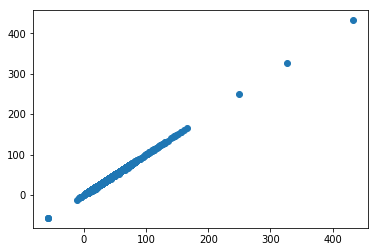

In [62]:
plt.scatter(y_test,prediction)

In [64]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))


print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 0.02
Variance score: 1.00
